<a href="https://colab.research.google.com/github/Gauravmy/ML06LAB/blob/main/ML06LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# 📘 Decision Tree Operations with File Upload
# Author: ChatGPT

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
# from tkinter import Tk, filedialog # No longer needed
from google.colab import files # Import files for Colab

# Step 1: Upload dataset (CSV)
def upload_dataset():
    print("📁 Please select a CSV dataset to upload...")
    # Tk().withdraw()  # hide tkinter root window # No longer needed
    # file_path = filedialog.askopenfilename( # No longer needed
    #     title="Select CSV file", # No longer needed
    #     filetypes=[("CSV Files", "*.csv")] # No longer needed
    # ) # No longer needed
    uploaded = files.upload() # Use Colab's file upload

    if not uploaded:
        print("⚠️ No file selected. Exiting.")
        return None

    # Assuming only one file is uploaded
    file_name = next(iter(uploaded))
    print(f"\n✅ File uploaded successfully: {file_name}")
    # Read the uploaded file into a pandas DataFrame
    return pd.read_csv(file_name)


# Step 2: Decision Tree Operations
def perform_decision_tree(df):
    print("\n📊 First 5 rows of dataset:")
    print(df.head())

    # Automatically pick target column (last column)
    target_col = df.columns[-1]
    print(f"\n🎯 Using target column: {target_col}")

    X = df.drop(target_col, axis=1)
    y = df[target_col]

    # Convert categorical data to numeric
    X = pd.get_dummies(X)

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    # Train model
    model = DecisionTreeClassifier(criterion='entropy', random_state=42)
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    print("\n📈 Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
    print("\n📋 Classification Report:")
    print(classification_report(y_test, y_pred))

    # Visualize tree
    plt.figure(figsize=(12, 8))
    plot_tree(model, feature_names=X.columns, class_names=True, filled=True)
    plt.title("Decision Tree Visualization")
    plt.show()

# Step 3: Run program
if __name__ == "__main__":
    print("🧠 Decision Tree Program — Upload Dataset and Train Model")
    df = upload_dataset()
    if df is not None:
        perform_decision_tree(df)

🧠 Decision Tree Program — Upload Dataset and Train Model
📁 Please select a CSV dataset to upload...


Saving titanic.csv to titanic (3).csv

✅ File uploaded successfully: titanic (3).csv

📊 First 5 rows of dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN       

ValueError: Input contains NaN

In [8]:
# ==============================
# 🌳 Decision Tree Classification (Colab Version)
# ==============================

# Step 1️⃣ — Import libraries
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from google.colab import files

# Step 2️⃣ — Upload dataset
print("📂 Please upload your CSV dataset (e.g., salaries.csv or titanic.csv)")
uploaded = files.upload()

# Get uploaded filename dynamically
for file_name in uploaded.keys():
    df = pd.read_csv(file_name)
    print(f"\n✅ Dataset '{file_name}' uploaded successfully!\n")

# Step 3️⃣ — Show first few rows
print("🔹 Dataset preview:")
display(df.head())

# Step 4️⃣ — Choose target column (manually adjust if needed)
print("\nColumns available:", list(df.columns))
target_col = input("\n🎯 Enter the target column name (e.g., salary_more_then_100k, Survived): ").strip()

# Step 5️⃣ — Prepare features & target
inputs = df.drop(target_col, axis='columns')
target = df[target_col]

# Step 6️⃣ — Encode categorical columns automatically
le_dict = {}
for col in inputs.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    inputs[col] = le.fit_transform(inputs[col])
    le_dict[col] = le
print("\n✅ All categorical columns encoded successfully.")

# Step 7️⃣ — Train Decision Tree model
model = tree.DecisionTreeClassifier()
model.fit(inputs, target)

# Step 8️⃣ — Check training accuracy
score = model.score(inputs, target)
print(f"\n📈 Training Accuracy: {score * 100:.2f}%")

# Step 9️⃣ — Test a manual prediction
print("\n🧠 You can make a manual prediction now.")
print("Available features:", list(inputs.columns))
try:
    sample = [float(x) for x in input("Enter feature values separated by commas: ").split(",")]
    pred = model.predict([sample])
    print(f"🎯 Predicted output: {pred}")
except Exception as e:
    print("⚠️ Skipped manual prediction (invalid input).")

# Step 🔟 — Visualize decision tree
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
tree.plot_tree(model, feature_names=inputs.columns, class_names=True, filled=True)
plt.title("Decision Tree Visualization")
plt.show()


📂 Please upload your CSV dataset (e.g., salaries.csv or titanic.csv)


Saving salaries_dt.csv to salaries_dt (2).csv

✅ Dataset 'salaries_dt (2).csv' uploaded successfully!

🔹 Dataset preview:


,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0



Columns available: ['company', 'job', 'degree', 'salary_more_then_100k']

🎯 Enter the target column name (e.g., salary_more_then_100k, Survived): 1


KeyError: "['1'] not found in axis"

📂 Please upload your dataset (CSV or Excel file)


Saving salaries_dt.csv to salaries_dt (3).csv

✅ File 'salaries_dt (3).csv' uploaded successfully!

🔹 Dataset Preview:


,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0



🔸 Shape: (16, 4)
🔸 Columns: ['company', 'job', 'degree', 'salary_more_then_100k']

🎯 Automatically selected Target Column: salary_more_then_100k

📈 Model Accuracy: 80.00%

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



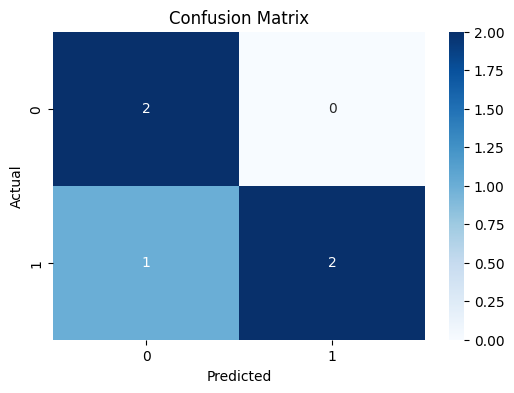

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


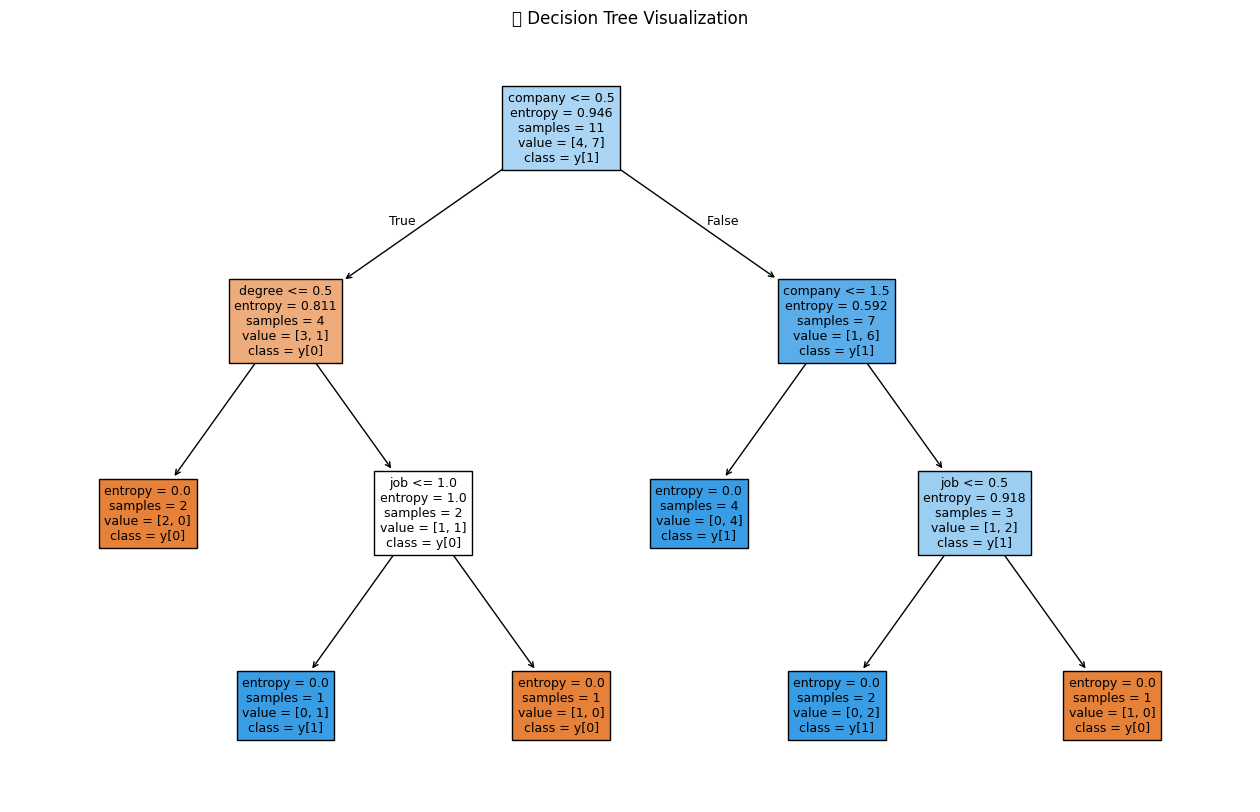


✅ Done! Model trained, evaluated, and visualized successfully.


In [9]:
# =====================================
# 🌳 Decision Tree Classifier - Auto Version
# =====================================

# Step 1️⃣ — Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Step 2️⃣ — Upload dataset
print("📂 Please upload your dataset (CSV or Excel file)")
uploaded = files.upload()

# Auto-detect file type
for file_name in uploaded.keys():
    if file_name.endswith('.csv'):
        df = pd.read_csv(file_name)
    elif file_name.endswith(('.xls', '.xlsx')):
        df = pd.read_excel(file_name)
    else:
        raise ValueError("Unsupported file format! Please upload a CSV or Excel file.")

print(f"\n✅ File '{file_name}' uploaded successfully!\n")

# Step 3️⃣ — Display basic info
print("🔹 Dataset Preview:")
display(df.head())
print("\n🔸 Shape:", df.shape)
print("🔸 Columns:", list(df.columns))

# Step 4️⃣ — Auto-select target column (last one)
target_col = df.columns[-1]
print(f"\n🎯 Automatically selected Target Column: {target_col}")

# Step 5️⃣ — Split into features and target
X = df.drop(target_col, axis=1)
y = df[target_col]

# Step 6️⃣ — Encode categorical columns automatically
le_dict = {}
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
        le_dict[col] = le

if y.dtype == 'object':
    le_y = LabelEncoder()
    y = le_y.fit_transform(y.astype(str))
    print("\n✅ Target column encoded successfully.")

# Step 7️⃣ — Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 8️⃣ — Train Decision Tree model
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

# Step 9️⃣ — Evaluate model
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"\n📈 Model Accuracy: {acc * 100:.2f}%")
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

# Step 🔟 — Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 11️⃣ — Visualize Decision Tree
plt.figure(figsize=(16, 10))
plot_tree(model, feature_names=X.columns, class_names=True, filled=True, fontsize=9)
plt.title("🌳 Decision Tree Visualization")
plt.show()

print("\n✅ Done! Model trained, evaluated, and visualized successfully.")


Decision Tree Classifier Titanic Dataset


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from google.colab import files

print("📂 Please upload your dataset (CSV or Excel file)")
uploaded = files.upload()

# Auto-detect file type
for file_name in uploaded.keys():
    if file_name.endswith('.csv'):
        df = pd.read_csv(file_name)
    elif file_name.endswith(('.xls', '.xlsx')):
        df = pd.read_excel(file_name)
    else:
        raise ValueError("Unsupported file format! Please upload a CSV or Excel file.")

print(f"\n✅ File '{file_name}' uploaded successfully!\n")

print("🔹 Original Dataset Preview:")
display(df.head())
print("\n🔸 Shape before cleaning:", df.shape)
print("🔸 Columns:", list(df.columns))

# Select only the specified columns
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']].copy()
print("\nSelected columns for modeling: Survived, Pclass, Sex, Age, Fare")

# Handle missing values in the selected columns
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

print("\n✅ Missing values handled successfully for selected columns.")

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col].astype(str))

print("\n🔤 Encoded categorical columns automatically.")

target_col = 'Survived'
X = df.drop(target_col, axis=1)
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"\n📈 Model Accuracy: {acc * 100:.2f}%")
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

print("\n✅ Done! Cleaned dataset trained, evaluated, and visualized successfully.")

📂 Please upload your dataset (CSV or Excel file)


Saving titanic.csv to titanic (8).csv

✅ File 'titanic (8).csv' uploaded successfully!

🔹 Original Dataset Preview:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



🔸 Shape before cleaning: (891, 12)
🔸 Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Selected columns for modeling: Survived, Pclass, Sex, Age, Fare

✅ Missing values handled successfully for selected columns.

🔤 Encoded categorical columns automatically.

📈 Model Accuracy: 76.12%

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.80       157
           1       0.74      0.66      0.70       111

    accuracy                           0.76       268
   macro avg       0.76      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268


✅ Done! Cleaned dataset trained, evaluated, and visualized successfully.


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from google.colab import files

print("📂 Please upload your dataset (CSV or Excel file)")
uploaded = files.upload()

# Auto-detect file type
for file_name in uploaded.keys():
    if file_name.endswith('.csv'):
        df = pd.read_csv(file_name)
    elif file_name.endswith(('.xls', '.xlsx')):
        df = pd.read_excel(file_name)
    else:
        raise ValueError("Unsupported file format! Please upload a CSV or Excel file.")

print(f"\n✅ File '{file_name}' uploaded successfully!\n")

print("🔹 Original Dataset Preview:")
display(df.head())
print("\n🔸 Shape before cleaning:", df.shape)
print("🔸 Columns:", list(df.columns))

# Select only the specified columns
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']].copy()
print("\nSelected columns for modeling: Survived, Pclass, Sex, Age, Fare")

# Handle missing values in the selected columns
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

print("\n✅ Missing values handled successfully for selected columns.")

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col].astype(str))

print("\n🔤 Encoded categorical columns automatically.")

target_col = 'Survived'
X = df.drop(target_col, axis=1)
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"\n📈 Model Accuracy: {acc * 100:.2f}%")
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

print("\n✅ Done! Cleaned dataset trained, evaluated, and visualized successfully.")


📂 Please upload your dataset (CSV or Excel file)


Saving titanic.csv to titanic (9).csv

✅ File 'titanic (9).csv' uploaded successfully!

🔹 Original Dataset Preview:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



🔸 Shape before cleaning: (891, 12)
🔸 Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Selected columns for modeling: Survived, Pclass, Sex, Age, Fare

✅ Missing values handled successfully for selected columns.

🔤 Encoded categorical columns automatically.

📈 Model Accuracy: 76.12%

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.80       157
           1       0.74      0.66      0.70       111

    accuracy                           0.76       268
   macro avg       0.76      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268


✅ Done! Cleaned dataset trained, evaluated, and visualized successfully.


In [16]:
X = df[['Pclass', 'Sex', 'Age', 'Fare']]
y = df['Survived']